In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = [
    "JetBrainsMono Nerd Font Mono",
    "Product Sans",
    "Helvetica",
]
plt.rcParams["font.size"] = 14

In [3]:
# Load the Titanic dataset
data = sns.load_dataset("titanic")

In [4]:
# Display the first few rows of the dataset
print("Dataset Overview:")
data.head()

Dataset Overview:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Check the shape of the dataset
print("\tDimension of dataset-> ", data.shape)

	Dimension of dataset->  (891, 15)


In [6]:
print("Columns in the dataset:\n")
data.columns
pd.DataFrame(data.columns, columns=["Columns"])

Columns in the dataset:



,Columns
0,survived
1,pclass
2,sex
3,age
4,sibsp
5,parch
6,fare
7,embarked
8,class
9,who


In [7]:
# Get information about the dataset
print("\nDataset Information:\n")
data.info()


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
print("Statistical description of dataset: ")
description = data.describe(include=["float"])  # Summary only for float columns
np.round(description, 2)  # Rounded to 2 decimal places

Statistical description of dataset: 


,age,fare
count,714.00,891.00
mean,29.70,32.20
std,14.53,49.69
min,0.42,0.00
25%,20.12,7.91
50%,28.00,14.45
75%,38.00,31.00
max,80.00,512.33


In [9]:
print("\nMissing Values:")
pd.DataFrame(data.isnull().sum(), columns=["Missing"])


Missing Values:


,Missing
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


<Axes: >

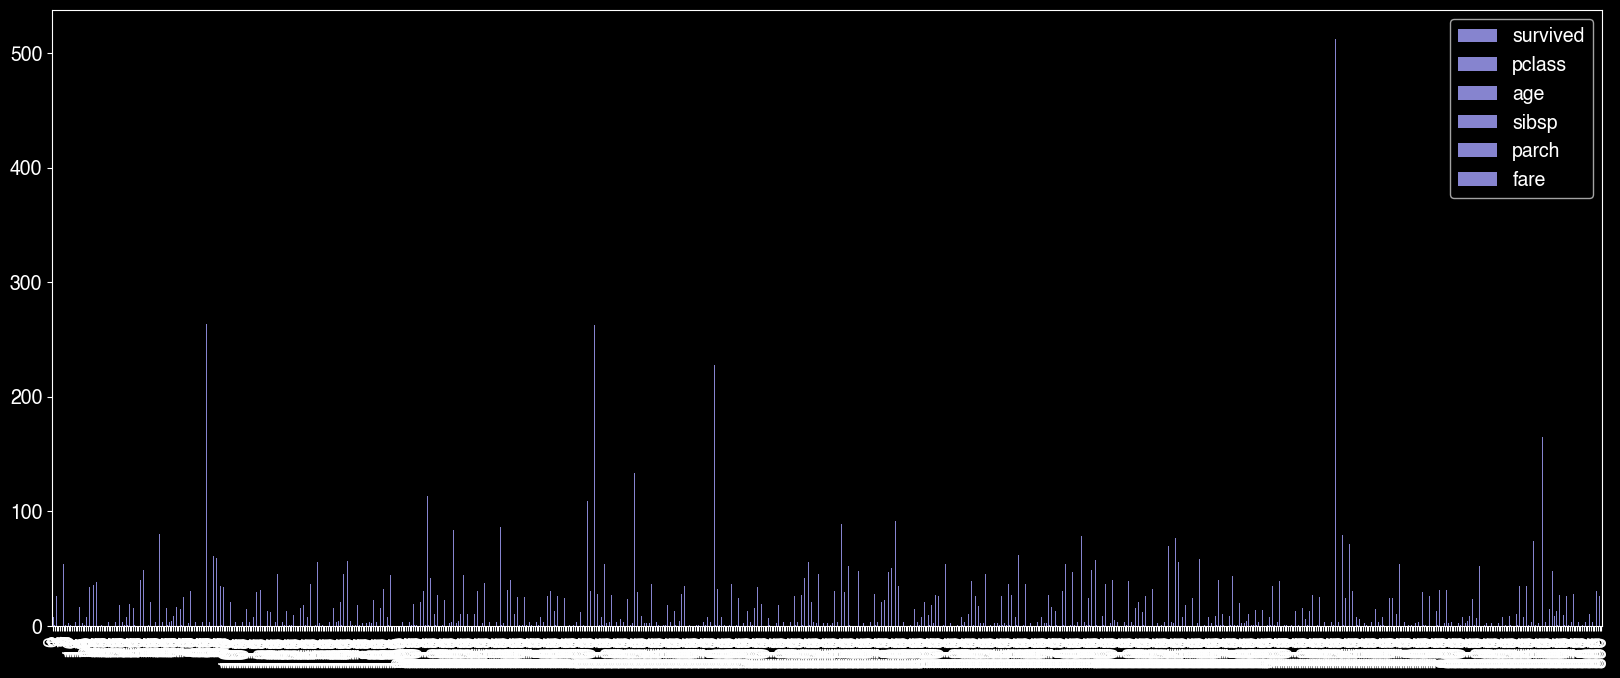

In [10]:
data.isnull().sum()  # Counts missing values in each column
data.plot.bar(
    figsize=(20, 8), color="#8684CF"
)  # Plot a bar graph (this may not be meaningful for a DataFrame)

Text(0.5, 0, 'Columns')

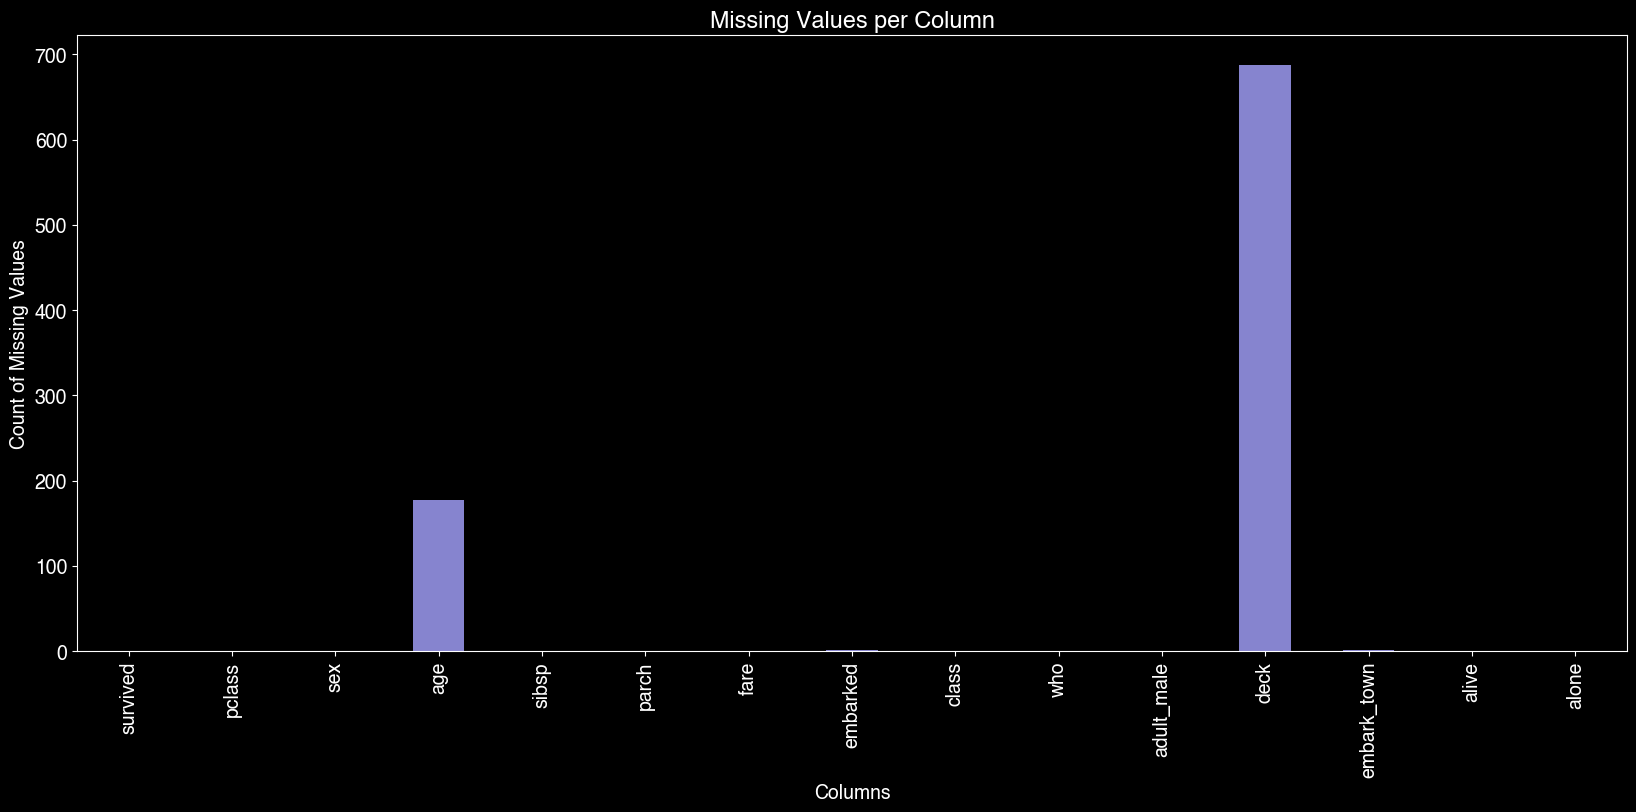

In [11]:
data.isnull().sum().plot.bar(
    figsize=(20, 8), color="#8684CF", title="Missing Values per Column"
)
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")

In [12]:
data = data.copy()
data["Age"] = pd.to_numeric(data["age"], errors="coerce").fillna(0).astype(int)

Text(0.5, 1.0, 'Fare per Age')

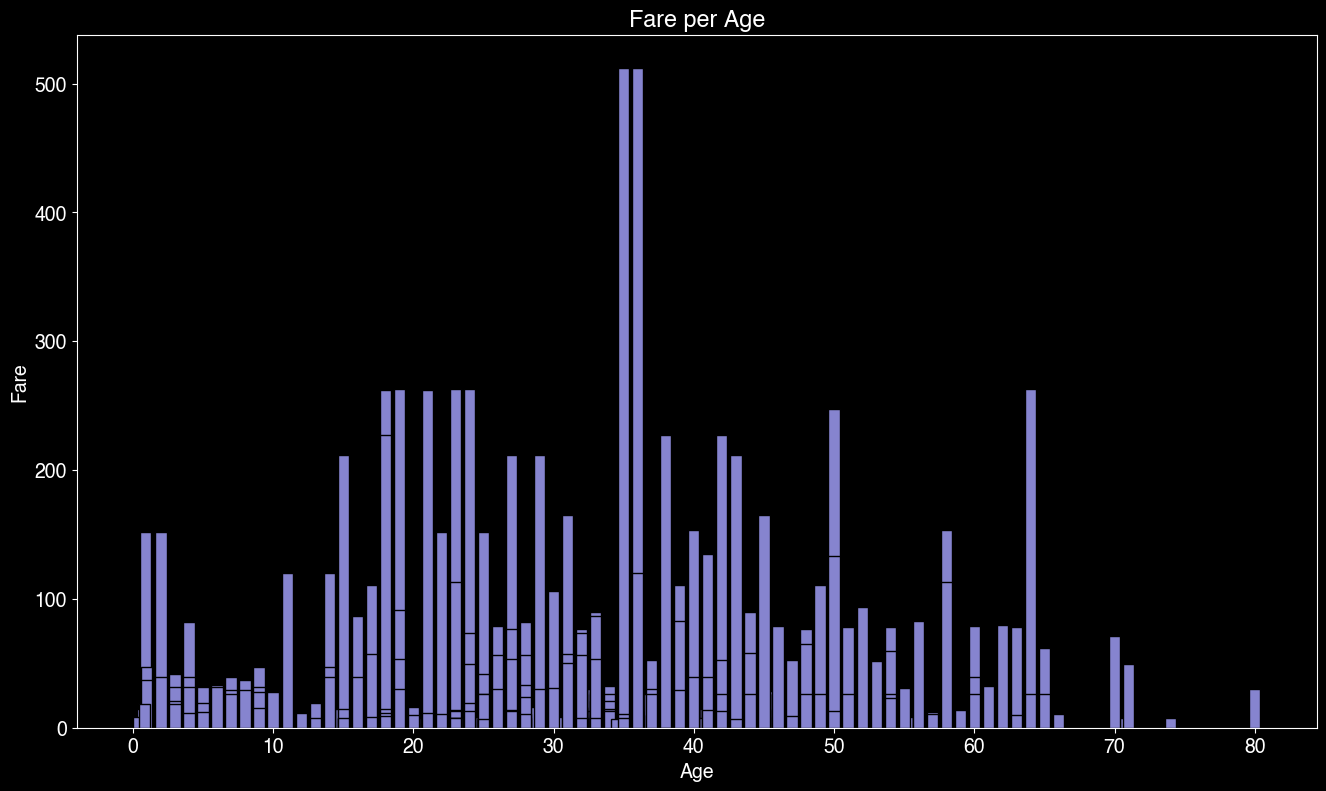

In [13]:
# Plotting a bar graph: Age vs Fare
plt.figure(figsize=(16, 9))
plt.bar(data["age"], data["fare"], color="#8684CF", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Fare per Age")

Text(0.5, 1.0, 'Age vs Survival')

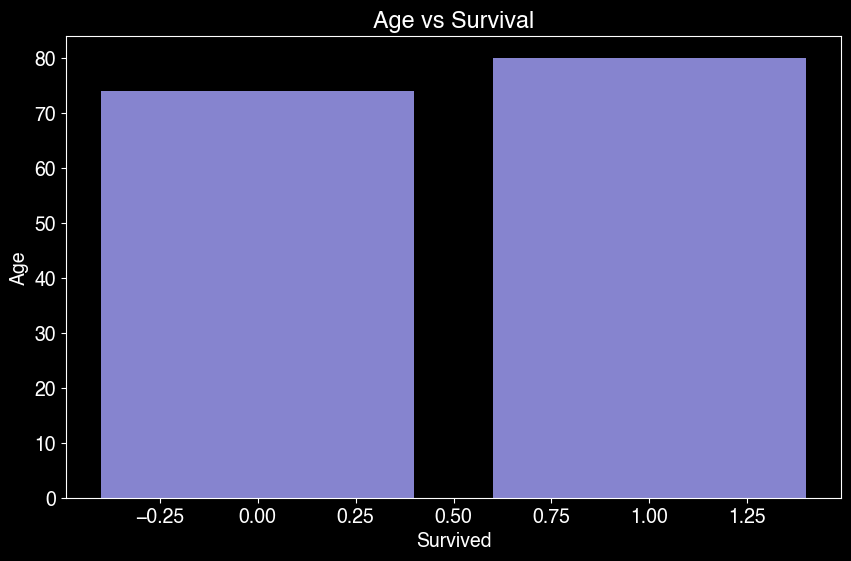

In [14]:
# Plotting a bar graph: Survived vs Age
plt.figure(figsize=(10, 6))
plt.bar(data["survived"], data["age"], color="#8684CF")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("Age vs Survival")

Text(0.5, 1.0, 'Age Distribution by Sex')

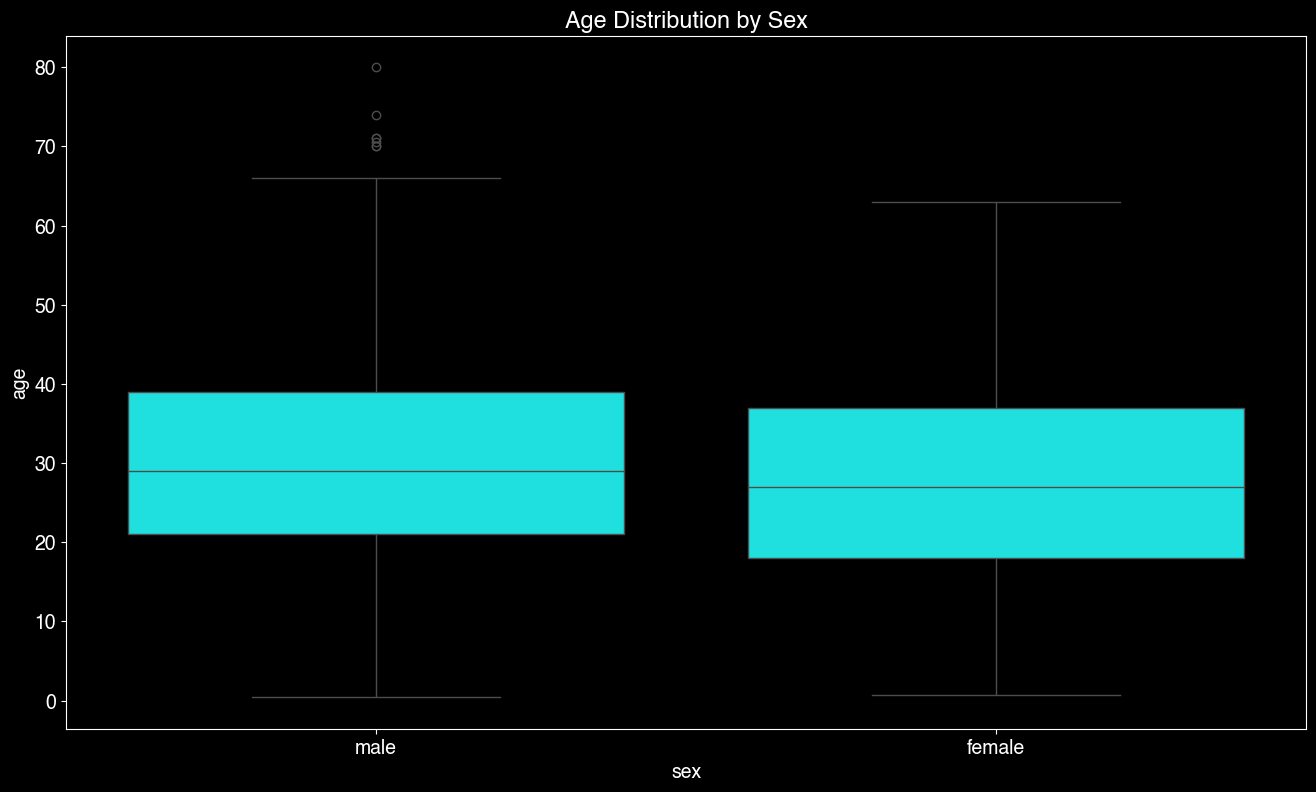

In [15]:
# Box Plot: Age distribution by Sex
plt.figure(figsize=(16, 9))
sns.boxplot(x="sex", y="age", data=data, color="cyan")
plt.title("Age Distribution by Sex")

Text(0.5, 1.0, 'Survival Rate by Number of Parents/Children Aboard (Parch)')

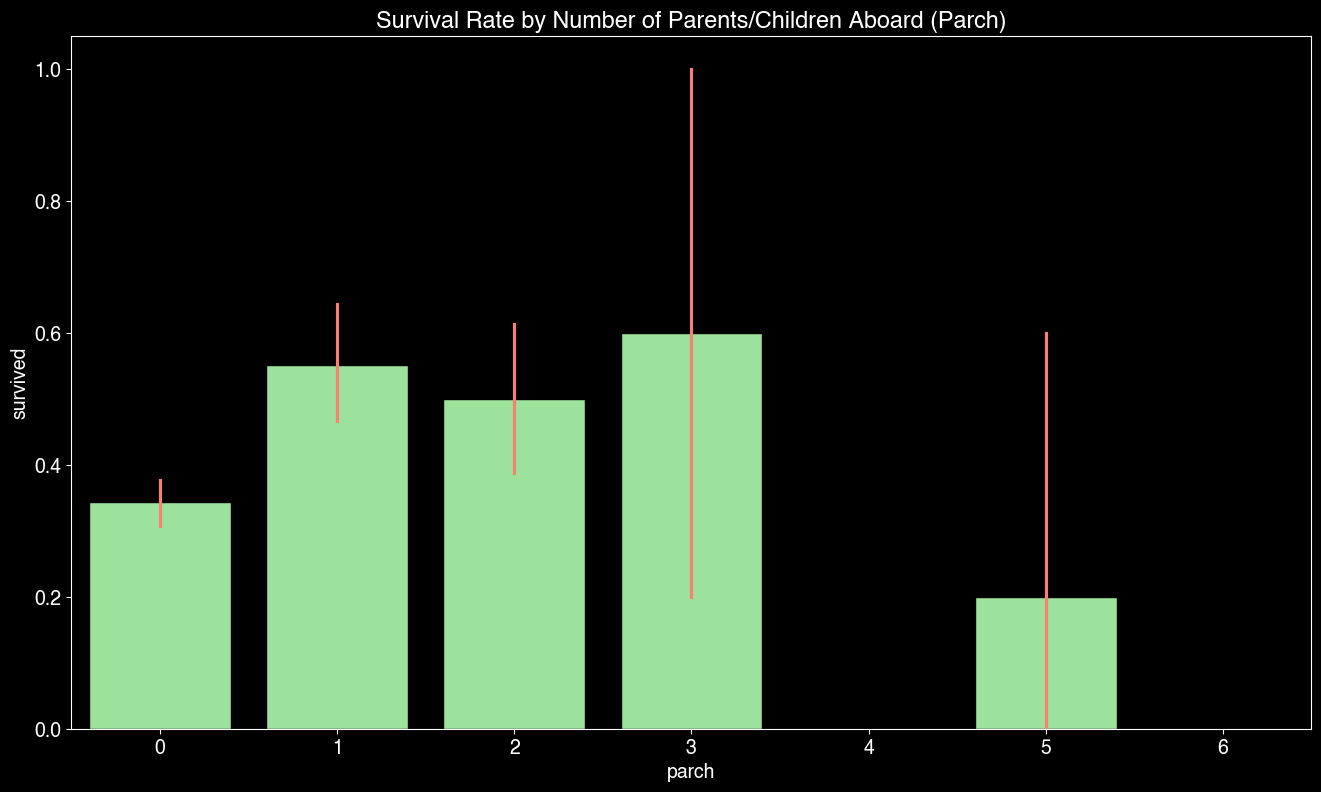

In [16]:
# Bar Plot: Survival rate by Number of Parents/Children Aboard (Parch)
plt.figure(figsize=(16, 9))
sns.barplot(
    x="parch",
    y="survived",
    data=data,
    color="lightgreen",
    edgecolor="black",
    err_kws={"color": "salmon"},
)
plt.title("Survival Rate by Number of Parents/Children Aboard (Parch)")

Text(0.5, 1.0, 'Age Distribution by Passenger Class')

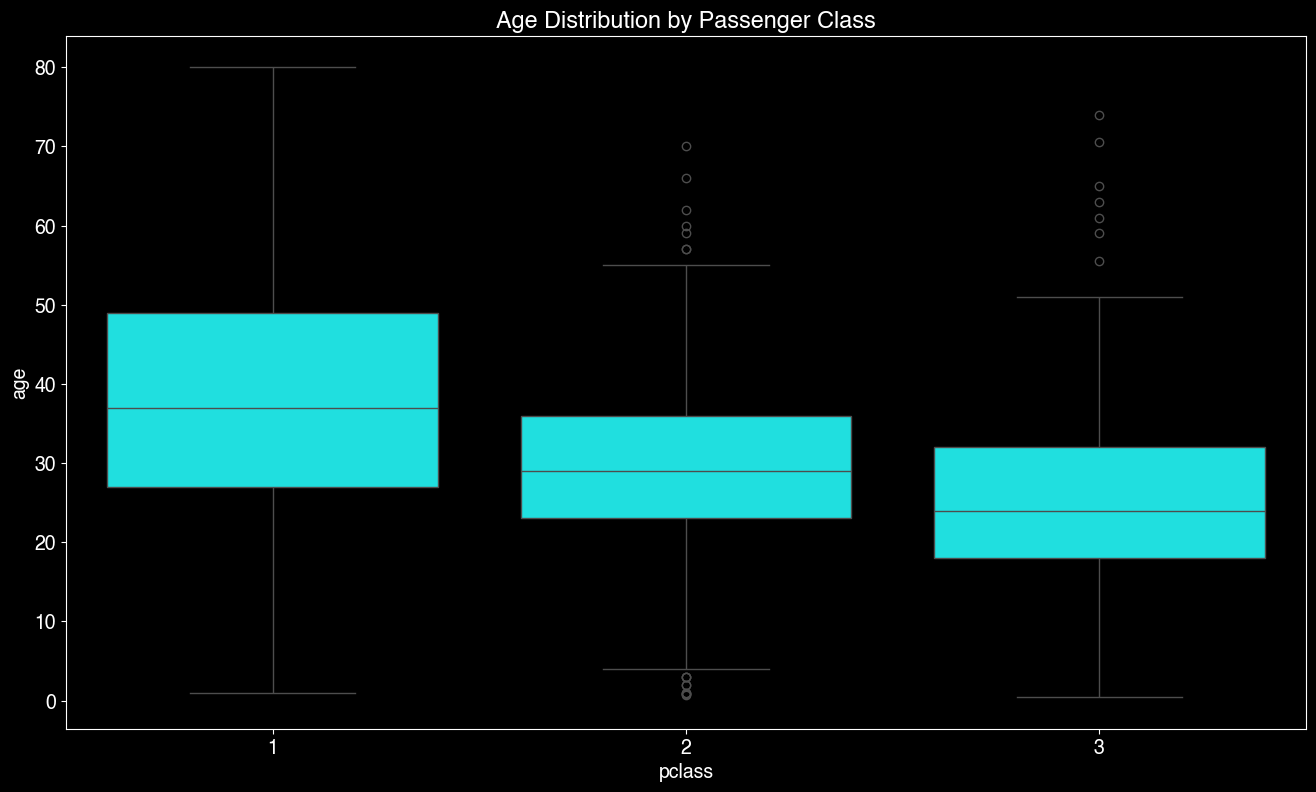

In [17]:
# Box Plot: Age distribution by Passenger Class (Pclass)
plt.figure(figsize=(16, 9))
sns.boxplot(x="pclass", y="age", data=data, color="cyan")
plt.title("Age Distribution by Passenger Class")

Text(0.5, 1.02, 'Pairwise Relationships by Survival')

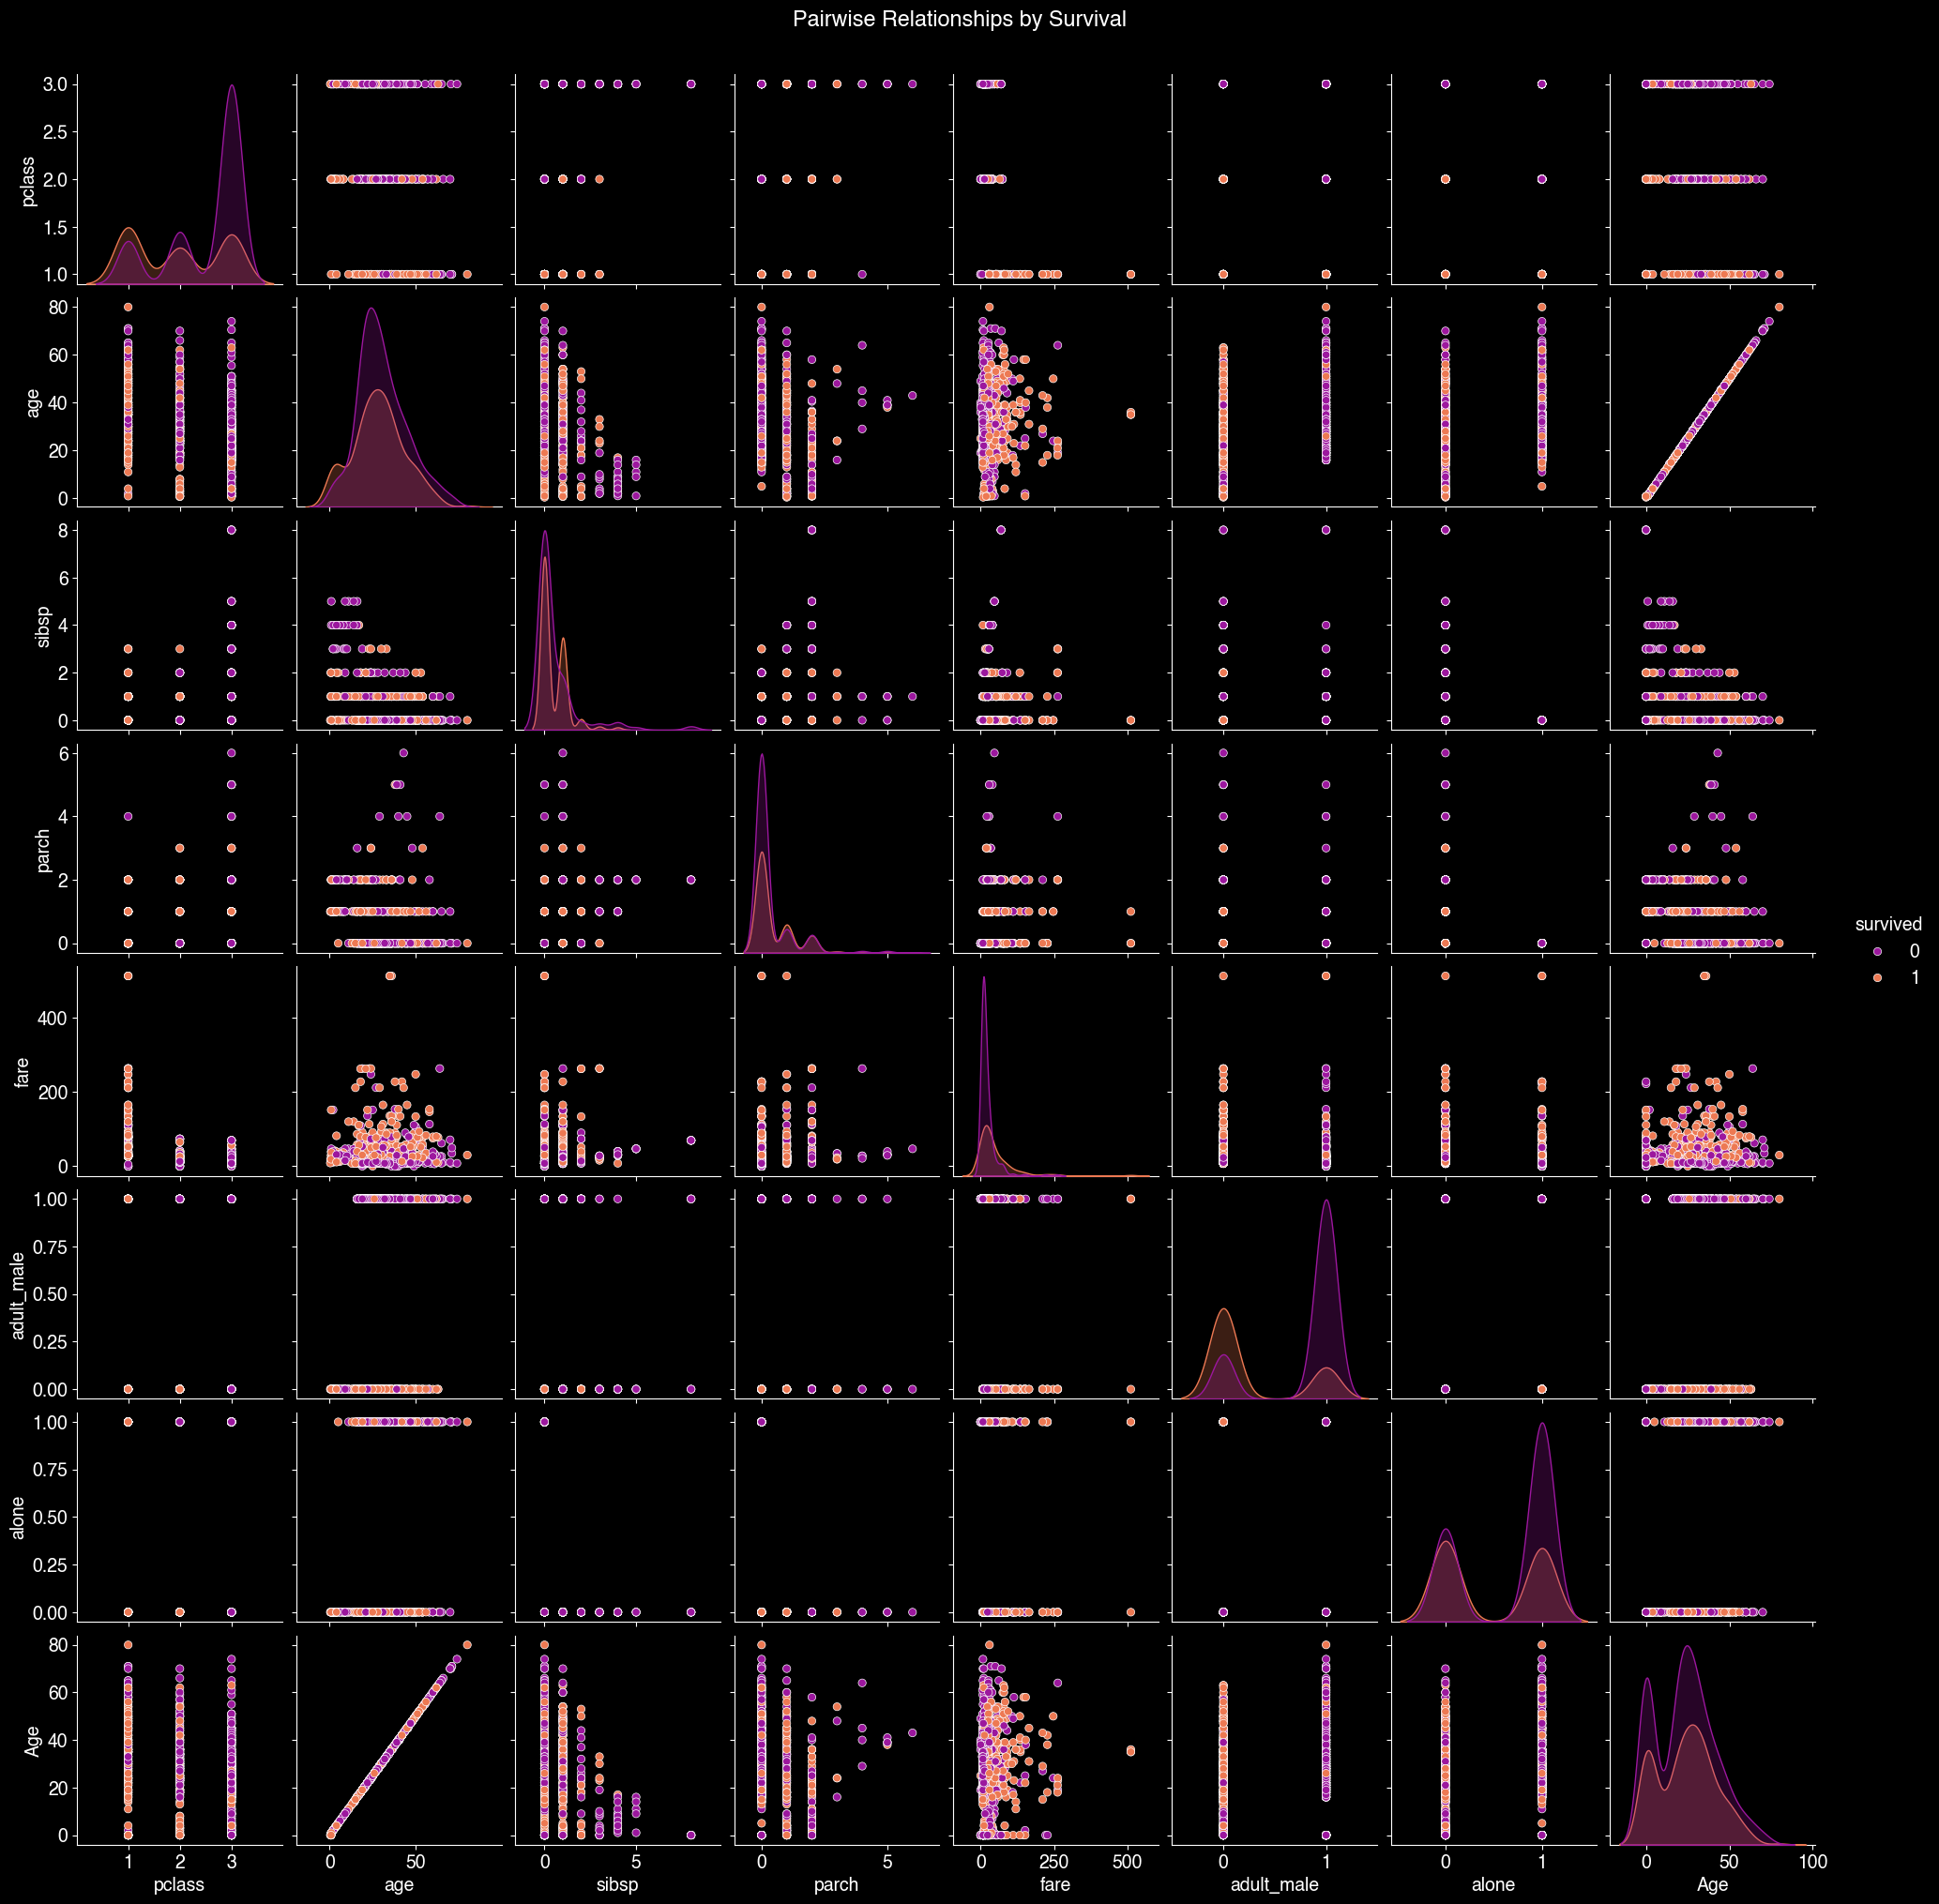

In [18]:
g = sns.pairplot(data, hue="survived", palette="plasma")
g.fig.suptitle("Pairwise Relationships by Survival", y=1.02)

Text(0.5, 1.0, 'Age Distribution')

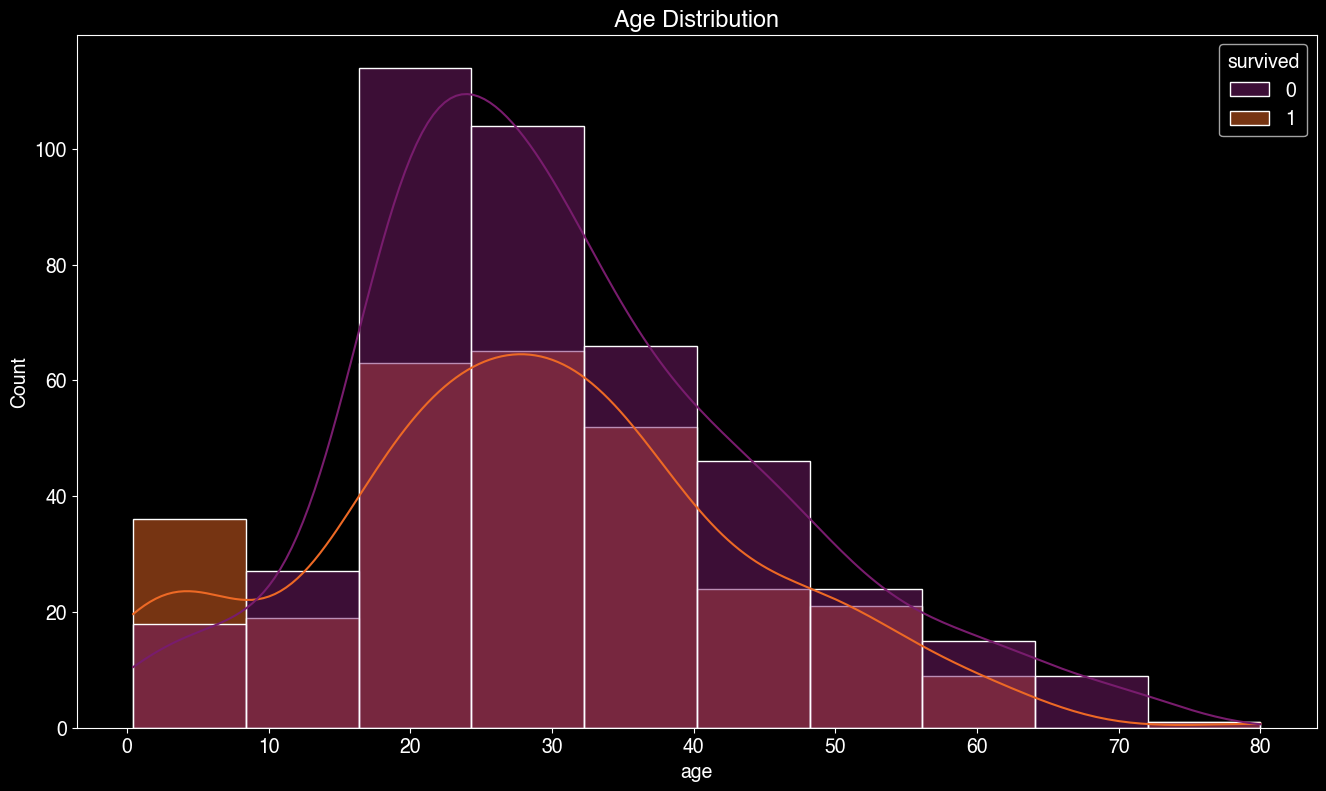

In [19]:
# Histogram: Distribution of Age
plt.figure(figsize=(16, 9))
sns.histplot(data, x="age", hue="survived", bins=10, kde=True, palette="inferno")
plt.title("Age Distribution")

Text(0.5, 1.0, 'Age Distribution by Sex')

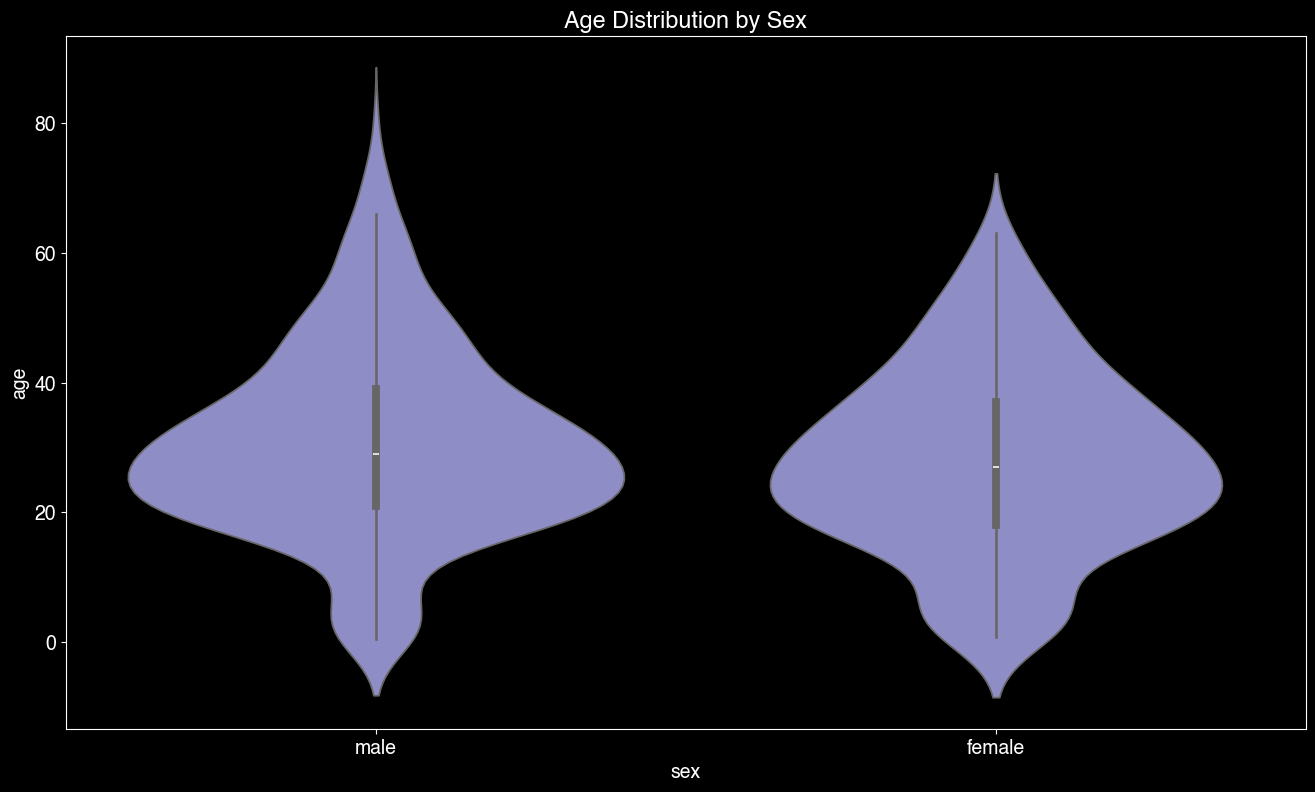

In [20]:
# Violin Plot: Age distribution by Sex
plt.figure(figsize=(16, 9))
sns.violinplot(x="sex", y="age", data=data, color="#8684CF")
plt.title("Age Distribution by Sex")

Text(0.5, 1.0, 'Age Distribution by Passenger Class')

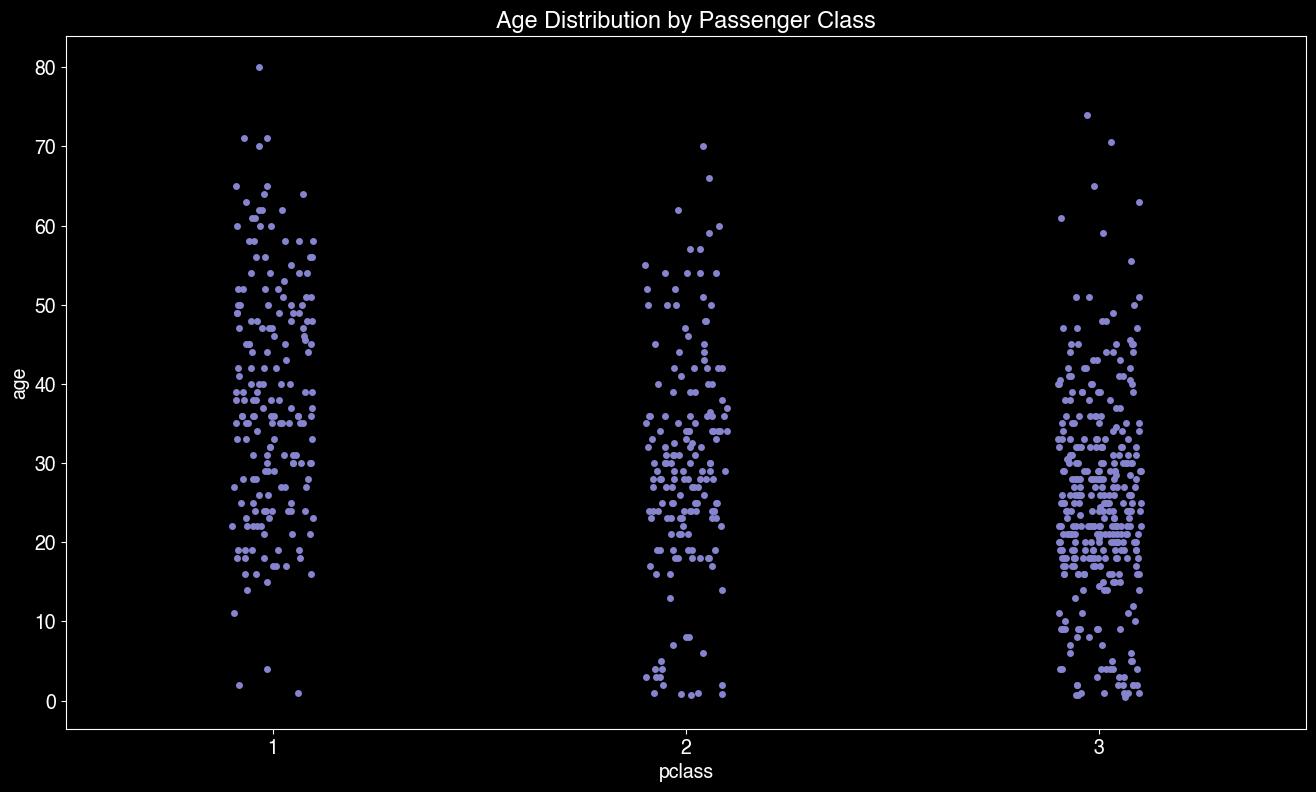

In [21]:
# Strip Plot: Age distribution by Passenger Class
plt.figure(figsize=(16, 9))
sns.stripplot(x="pclass", y="age", data=data, jitter=True, color="#8684CF")
plt.title("Age Distribution by Passenger Class")

Text(0.5, 1.0, 'Fare Distribution')

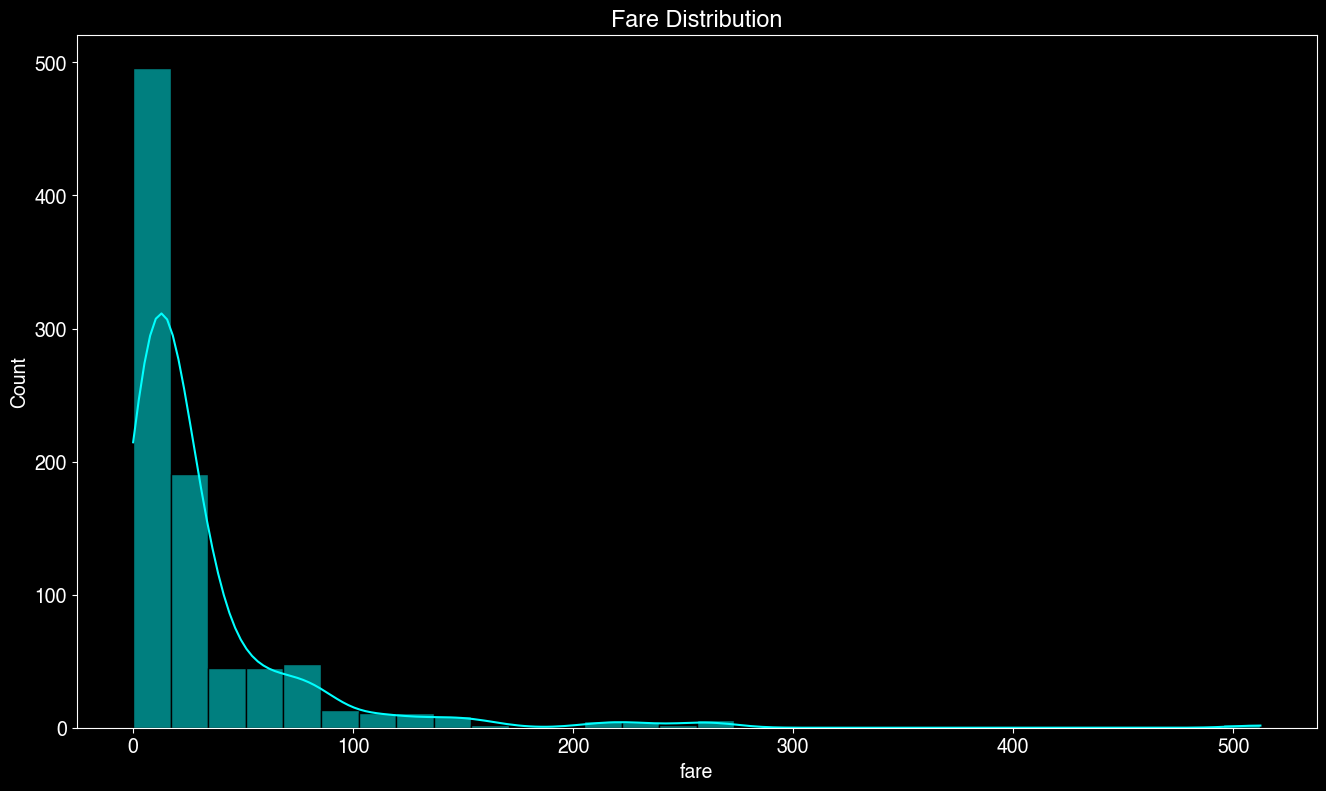

In [22]:
# Histogram: Distribution of Fare
plt.figure(figsize=(16, 9))
sns.histplot(data["fare"], bins=30, kde=True, color="cyan", edgecolor="black")
plt.title("Fare Distribution")

Text(0.5, 1.0, 'Correlation Matrix')

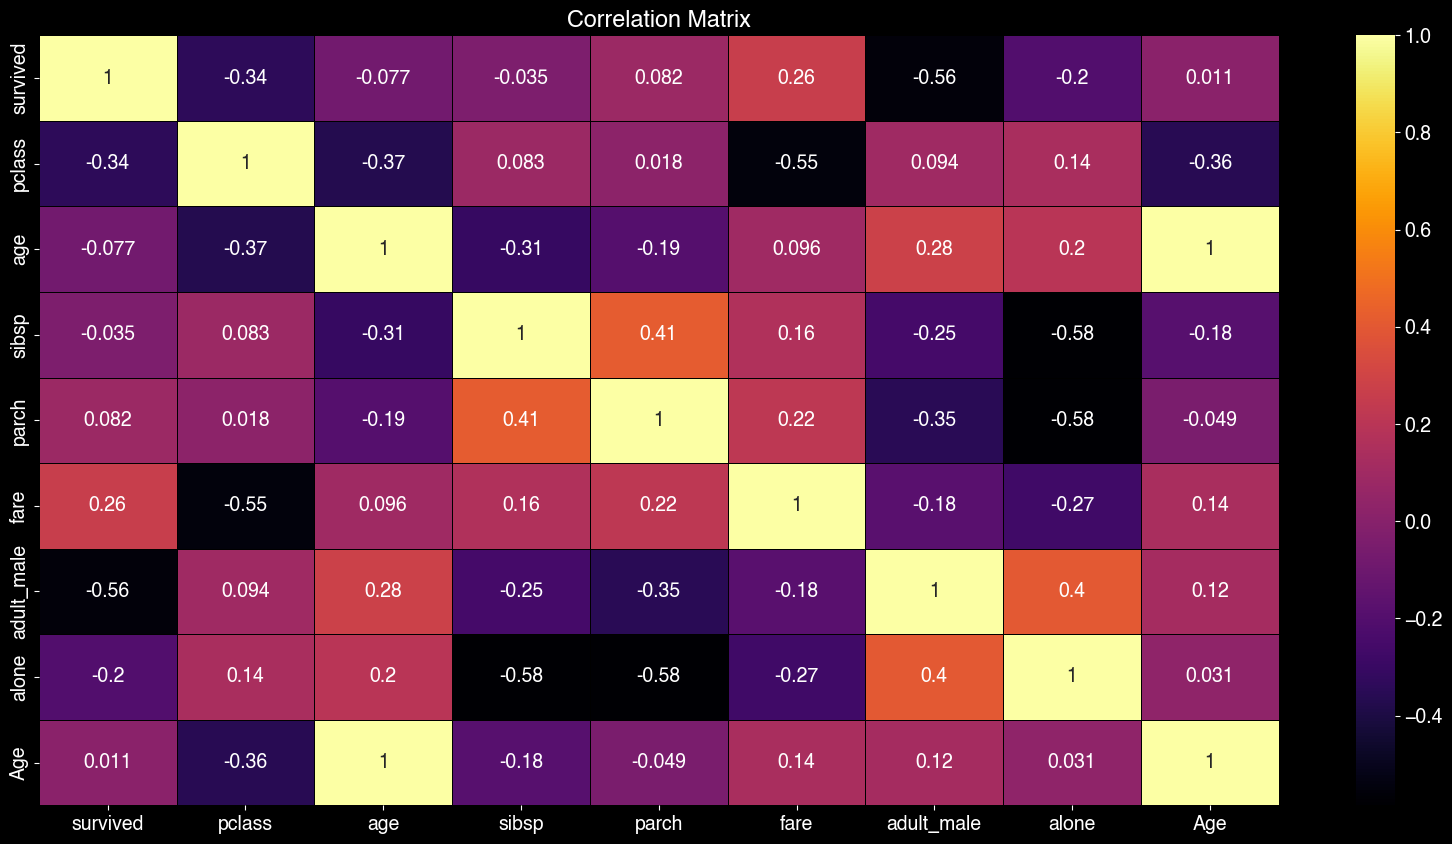

In [23]:
# Heatmap: Correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(
    data.corr(numeric_only=True),
    annot=True,
    cmap="inferno",
    linewidths=0.5,
    linecolor="black",
)
plt.title("Correlation Matrix")

Text(0.5, 1.0, 'Survival Count by Passenger Class')

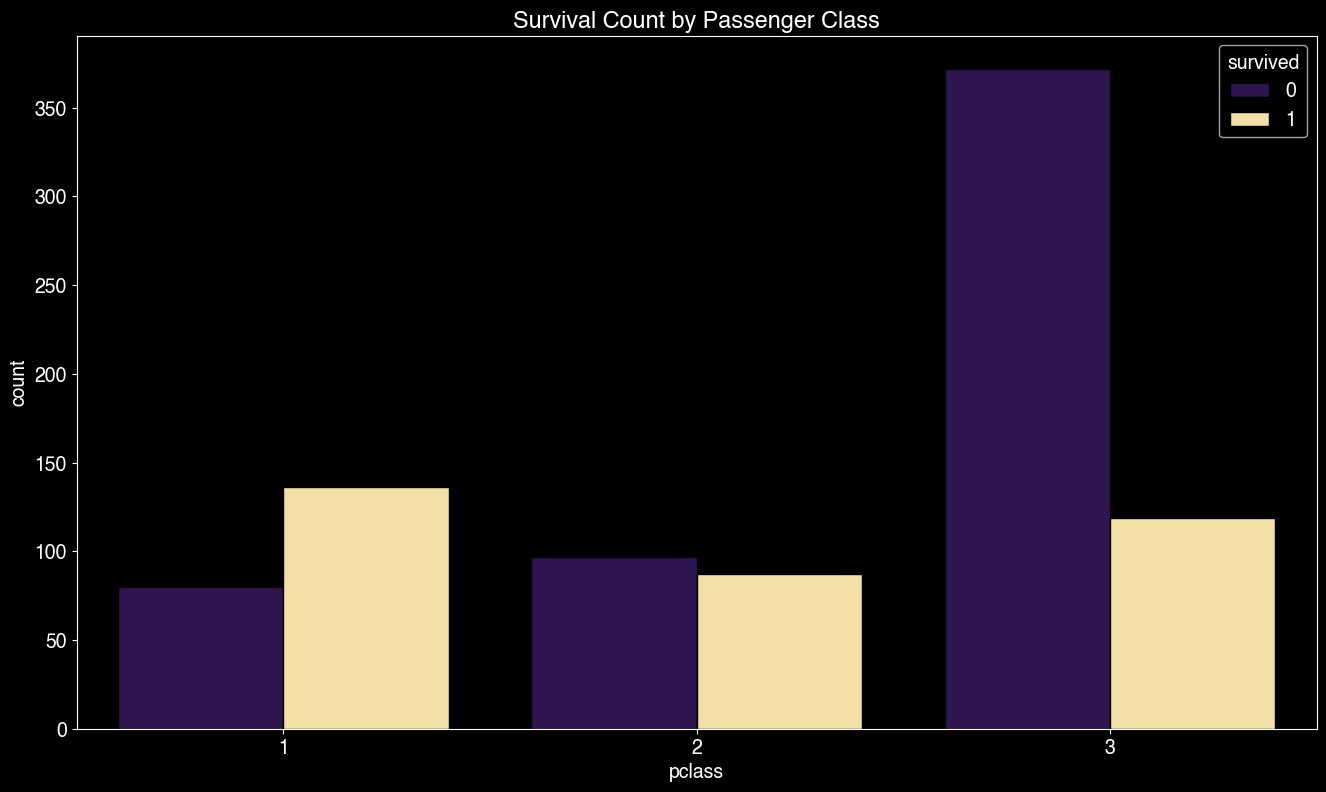

In [24]:
plt.figure(figsize=(16, 9))
sns.countplot(
    x="pclass",
    hue="survived",
    data=data,
    palette=["#2D0C58", "#FFE699"],
    edgecolor="black",
)
plt.title("Survival Count by Passenger Class")

Text(0.5, 1.0, 'Survival Count by Sex')

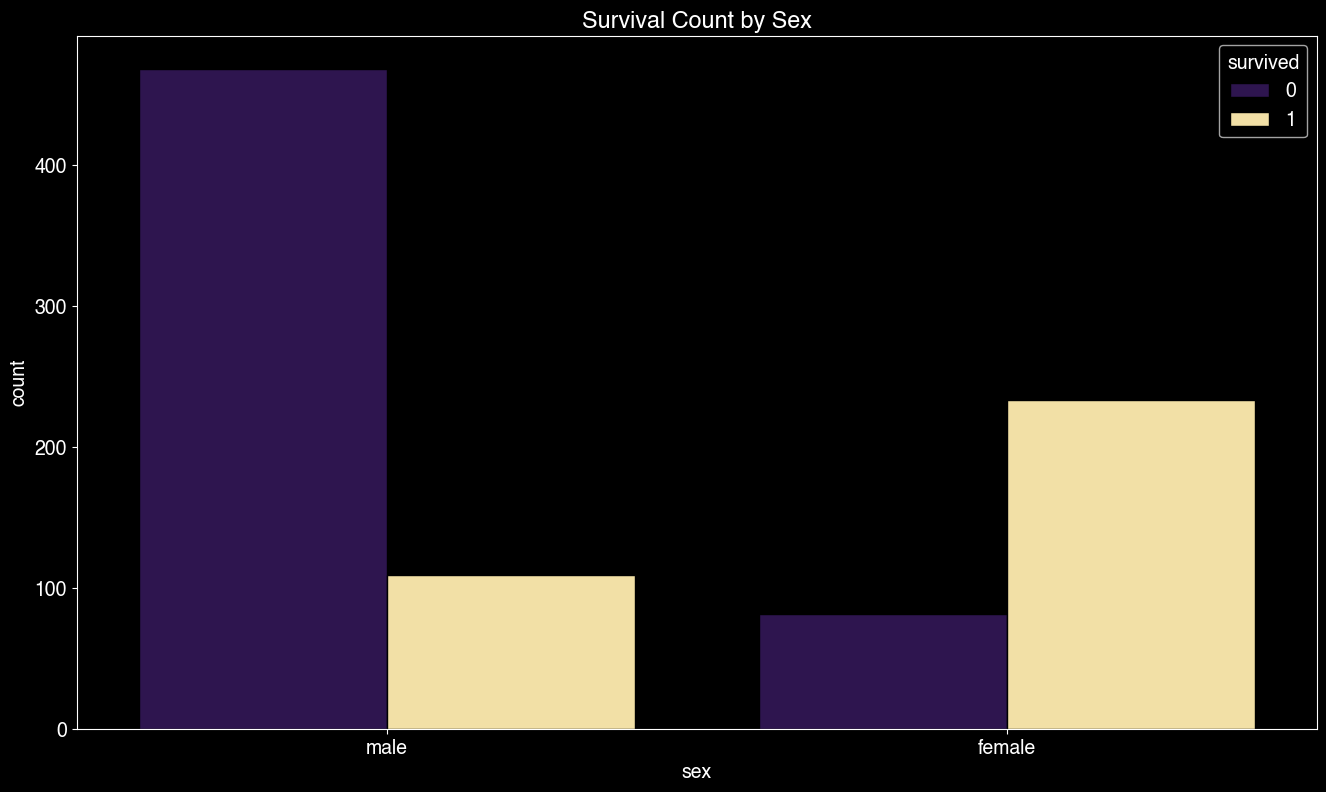

In [25]:
# Count Plot: Survival by Sex
plt.figure(figsize=(16, 9))
sns.countplot(
    x="sex",
    hue="survived",
    data=data,
    palette=["#2D0C58", "#FFE699"],
    edgecolor="black",
)
plt.title("Survival Count by Sex")

Text(0.5, 1.0, 'Age Distribution by Passenger Class and Survival')

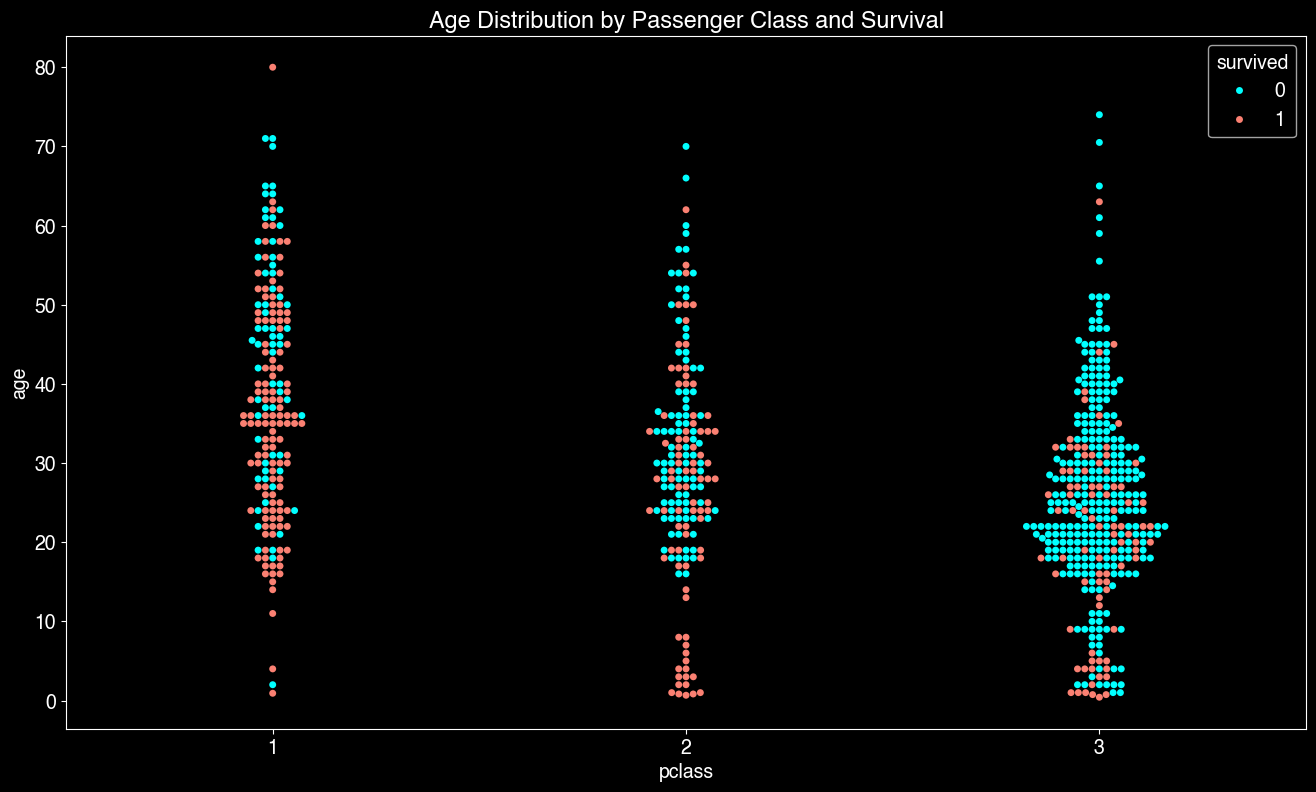

In [26]:
# Swarm Plot: Age distribution by Passenger Class and Survival
plt.figure(figsize=(16, 9))
sns.swarmplot(
    x="pclass",
    y="age",
    hue="survived",
    data=data,
    palette=["cyan", "salmon"],
    edgecolor="black",
)
plt.title("Age Distribution by Passenger Class and Survival")

Text(0.5, 1.05, 'Survival Rate by Age and Sex')

<Figure size 1600x900 with 0 Axes>

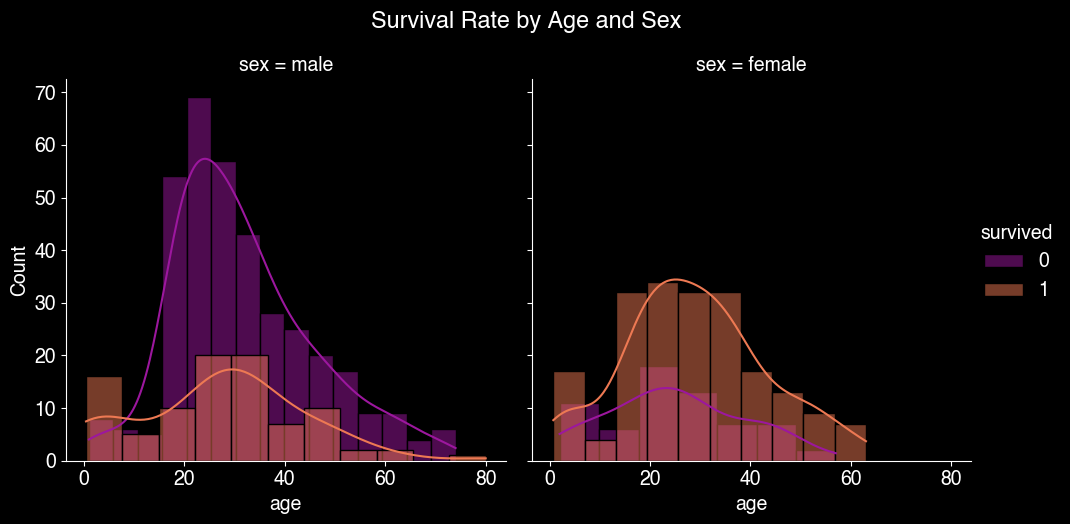

In [27]:
# FacetGrid: Survival rate by Age and Sex
plt.figure(figsize=(16, 9))
g = sns.FacetGrid(data, col="sex", hue="survived", height=5, palette="plasma")
g.map(
    sns.histplot,
    "age",
    kde=True,
    edgecolor="black",
)
g.add_legend()
plt.suptitle("Survival Rate by Age and Sex", y=1.05)

Text(0.5, 1.0, 'Average Fare by Passenger Class')

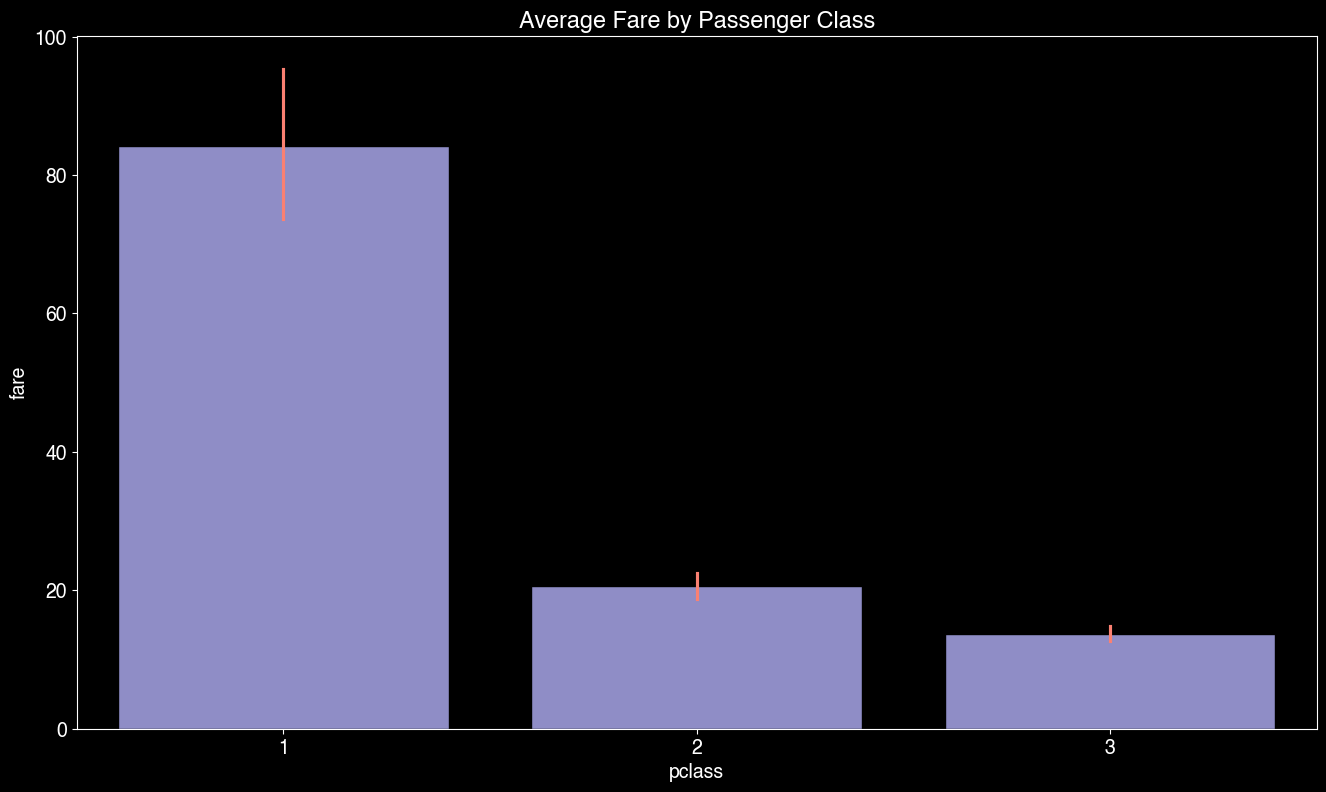

In [28]:
# Bar Plot: Average Fare by Passenger Class
plt.figure(figsize=(16, 9))
sns.barplot(
    x="pclass",
    y="fare",
    data=data,
    color="#8684CF",
    edgecolor="black",
    err_kws={"color": "salmon"},
)
plt.title("Average Fare by Passenger Class")

Text(0.5, 1.0, 'Survival Rate by Embarkation Port')

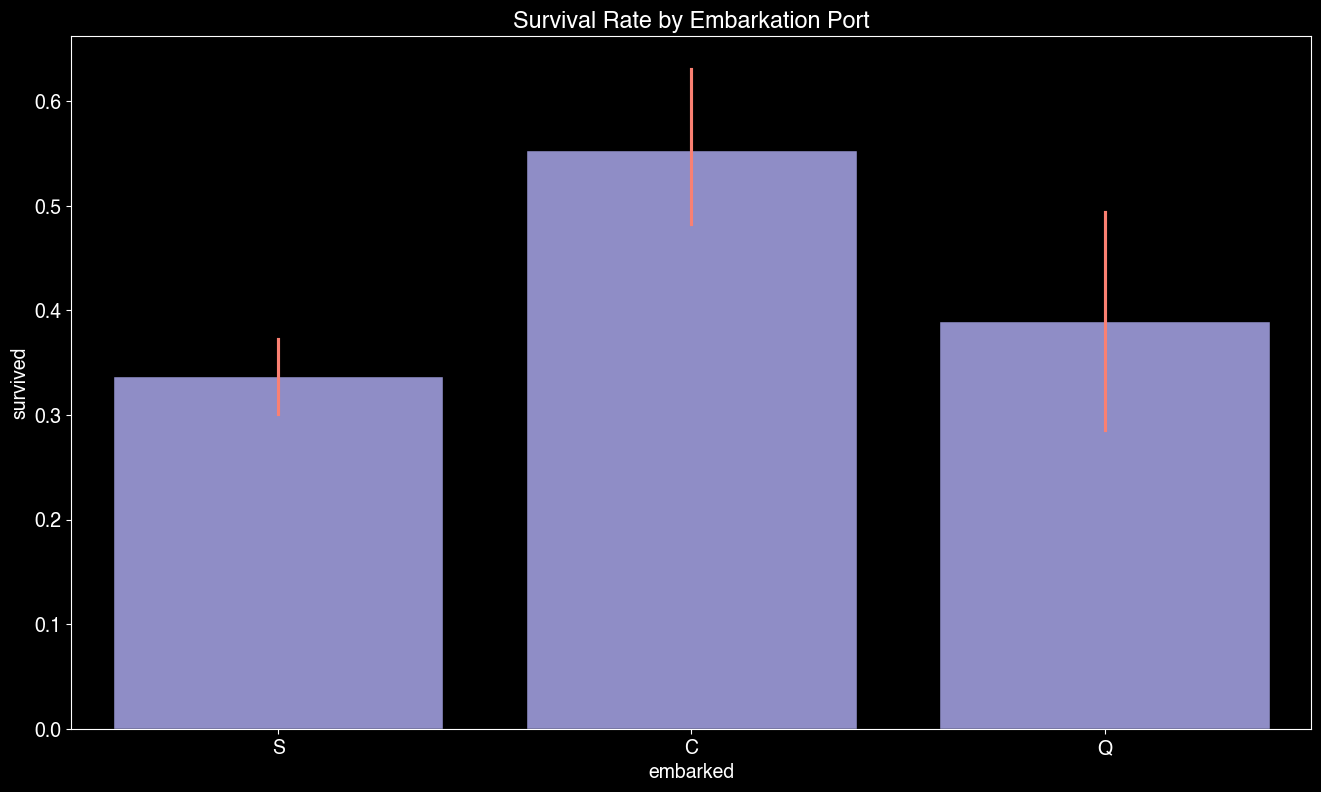

In [29]:
# Bar Plot: Survival rate by Embarkation Port
plt.figure(figsize=(16, 9))
sns.barplot(
    x="embarked",
    y="survived",
    data=data,
    color="#8684CF",
    edgecolor="black",
    err_kws={"color": "salmon"},
)
plt.title("Survival Rate by Embarkation Port")

Text(0.5, 1.0, 'Fare Distribution by Passenger Class')

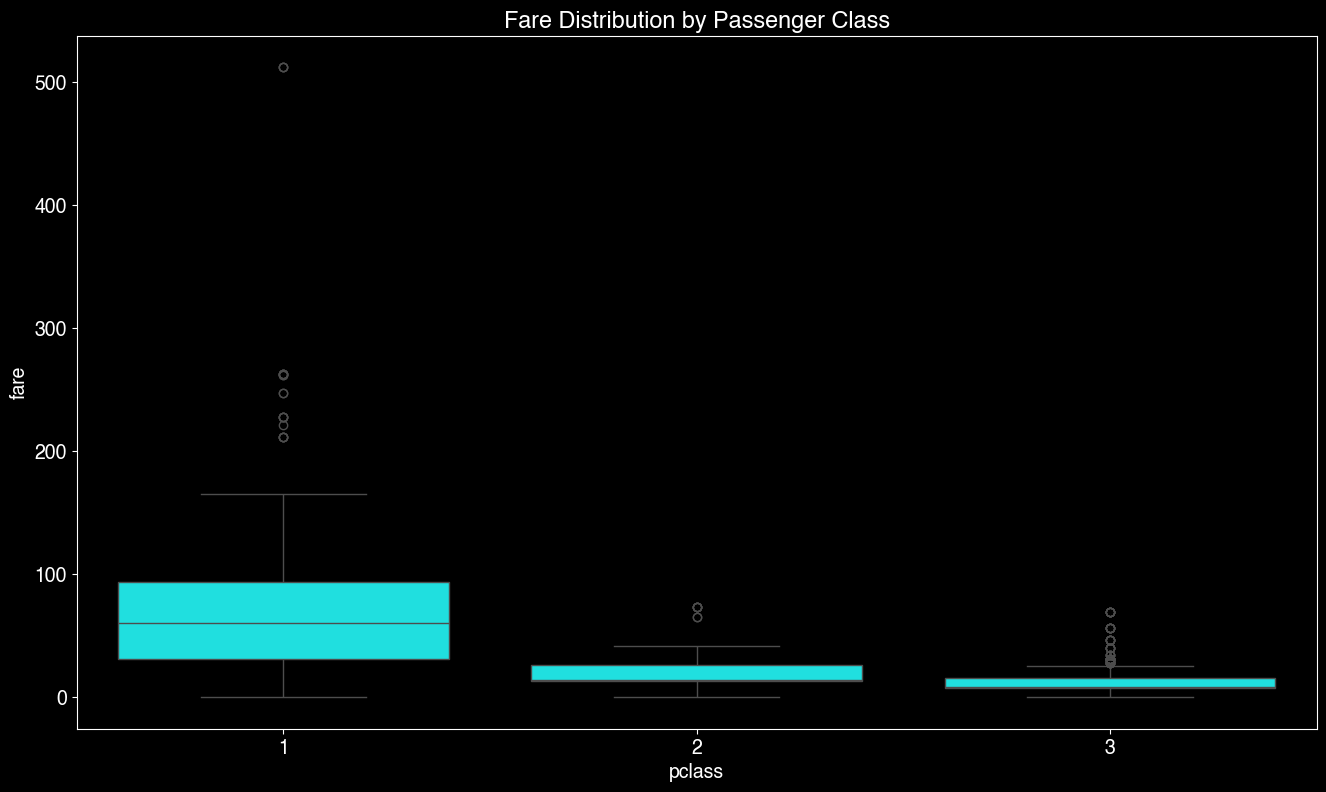

In [30]:
# Box Plot: Fare distribution by Passenger Class
plt.figure(figsize=(16, 9))
sns.boxplot(x="pclass", y="fare", data=data, color="cyan")
plt.title("Fare Distribution by Passenger Class")

Text(0.5, 1.0, 'Fare Distribution by Survival')

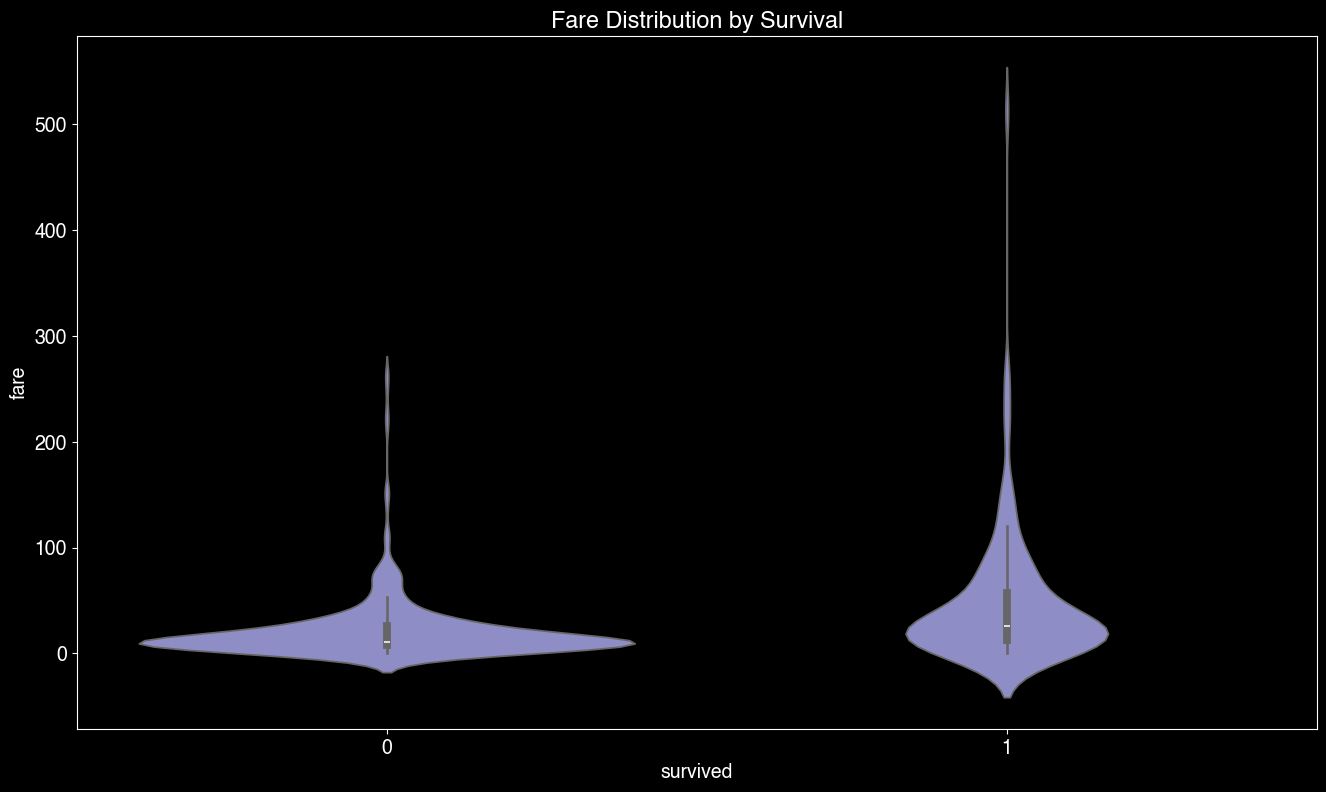

In [31]:
# Violin Plot: Fare distribution by Survival
plt.figure(figsize=(16, 9))
sns.violinplot(x="survived", y="fare", data=data, color="#8684CF")
plt.title("Fare Distribution by Survival")